In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:100% !important;}
div.CodeMirror {font-family:Consolas; font-size:22pt;}
div.output {font-size:24pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:22pt;}
div.prompt {min-width:70px;}
</style>
"""))

<b><font size="6" color="red">ch12. 데이터프레임과 시리즈(Pandas)</font></b>
- pip install pandas

# 8절. 데이터 그룹화 및 집계

In [1]:
import pandas as pd
import numpy as np
from statsmodels.api import datasets
iris_df = datasets.get_rdataset('iris').data
iris_df.head(1)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa


## 8.1 Group by

In [6]:
iris_grouped = iris_df.groupby(iris_df.Species)
iris_grouped_sum = iris_grouped.sum()
iris_grouped_sum

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Species,,,,
setosa,250.3,171.4,73.1,12.3
versicolor,296.8,138.5,213.0,66.3
virginica,329.4,148.7,277.6,101.3


In [7]:
iris_grouped_sum.reset_index() # index를 컬럼 데이터로 편입

,Species,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,setosa,250.3,171.4,73.1,12.3
1,versicolor,296.8,138.5,213.0,66.3
2,virginica,329.4,148.7,277.6,101.3


In [9]:
iris_df.groupby(iris_df.Species).sum()
iris_df.groupby(['Species']).sum()
iris_df.groupby('Species').sum()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Species,,,,
setosa,250.3,171.4,73.1,12.3
versicolor,296.8,138.5,213.0,66.3
virginica,329.4,148.7,277.6,101.3


In [15]:
# 종별 Sepal.Length의 합계
# iris_df.groupby(['인덱스로 사용할 컬럼명'])['계산될 컬럼명'].연산()
iris_df.groupby(['Species'])['Sepal.Length'].sum() # 결과가 시리즈

Species
setosa        250.3
versicolor    296.8
virginica     329.4
Name: Sepal.Length, dtype: float64

In [16]:
iris_df.pivot_table(index='Species',
                   values=['Sepal.Length'],
                   aggfunc='sum') # 결과가 데이터프레임

,Sepal.Length
Species,
setosa,250.3
versicolor,296.8
virginica,329.4


In [20]:
iris_df.groupby(['Species']).count()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Species,,,,
setosa,50,50,50,50
versicolor,50,50,50,50
virginica,50,50,50,50


In [22]:
iris_df.loc[1, 'Sepal.Length'] = np.nan
iris_df.groupby(['Species']).count()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Species,,,,
setosa,49,50,50,50
versicolor,50,50,50,50
virginica,50,50,50,50


In [24]:
iris_df.loc[1, 'Sepal.Length'] = 4.9
iris_df.groupby('Species')['Sepal.Length'].count()

Species
setosa        50
versicolor    50
virginica     50
Name: Sepal.Length, dtype: int64

In [27]:
iris_df['Species'].value_counts()

virginica     50
setosa        50
versicolor    50
Name: Species, dtype: int64

### 다중열로 그룹화

In [31]:
r = iris_df.groupby(['Species','Sepal.Length']).sum()
r.loc['setosa']

,Sepal.Width,Petal.Length,Petal.Width
Sepal.Length,,,
4.3,3.0,1.1,0.1
4.4,9.1,4.0,0.6
4.5,2.3,1.3,0.3
4.6,13.3,5.3,0.9
4.7,6.4,2.9,0.4
4.8,15.9,7.9,1.0
4.9,12.8,5.8,0.6
5.0,26.9,11.6,2.3
5.1,28.8,12.5,2.5


In [33]:
iris_df.groupby(['Species']).describe().T

Species                setosa  versicolor  virginica
Sepal.Length count  50.000000   50.000000  50.000000
             mean    5.006000    5.936000   6.588000
             std     0.352490    0.516171   0.635880
             min     4.300000    4.900000   4.900000
             25%     4.800000    5.600000   6.225000
             50%     5.000000    5.900000   6.500000
             75%     5.200000    6.300000   6.900000
             max     5.800000    7.000000   7.900000
Sepal.Width  count  50.000000   50.000000  50.000000
             mean    3.428000    2.770000   2.974000
             std     0.379064    0.313798   0.322497
             min     2.300000    2.000000   2.200000
             25%     3.200000    2.525000   2.800000
             50%     3.400000    2.800000   3.000000
             75%     3.675000    3.000000   3.175000
             max     4.400000    3.400000   3.800000
Petal.Length count  50.000000   50.000000  50.000000
             mean    1.462000    4.260000   5.552000
             std     0.173664    0.469911   0.551895
             min     1.000000    3.000000   4.500000
             25%     1.400000    4.000000   5.100000
             50%     1.500000    4.350000   5.550000
             75%     1.575000    4.600000   5.875000
             max     1.900000    5.100000   6.900000
Petal.Width  count  50.000000   50.000000  50.000000
             mean    0.246000    1.326000   2.026000
             std     0.105386    0.197753   0.274650
             min     0.100000    1.000000   1.400000
             25%     0.200000    1.200000   1.800000
             50%     0.200000    1.300000   2.000000
             75%     0.300000    1.500000   2.300000
             max     0.600000    1.800000   2.500000

In [34]:
g = iris_df.groupby('Species').mean()
g

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


https://stackoverflow.com/questions/30490740/move-legend-outside-figure-in-seaborn-tsplot
 : 범례를 밖으로 예제 참조

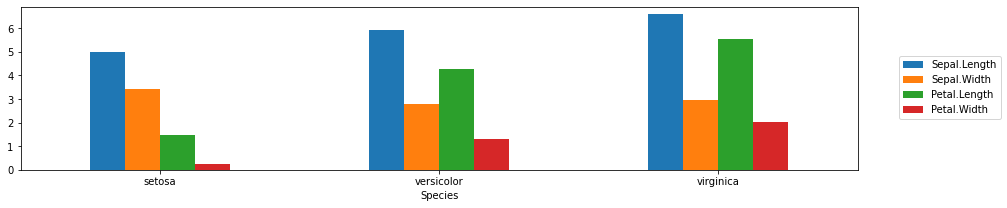

In [42]:
import matplotlib.pyplot as plt
g.plot(kind='bar', rot=0, figsize=(15,3))
plt.legend(bbox_to_anchor=(1.05, 0.7), loc=2, borderaxespad=0.)
plt.show()

In [44]:
# Species, Petal.Width별 mean()
g = iris_df.groupby(['Species','Petal.Width']).mean()
g

Sepal.Length  Sepal.Width  Petal.Length
Species    Petal.Width                                         
setosa     0.1              4.820000     3.360000      1.380000
           0.2              4.972414     3.379310      1.444828
           0.3              4.971429     3.328571      1.428571
           0.4              5.300000     3.785714      1.571429
           0.5              5.100000     3.300000      1.700000
           0.6              5.000000     3.500000      1.600000
versicolor 1.0              5.414286     2.371429      3.628571
           1.1              5.400000     2.466667      3.566667
           1.2              5.780000     2.740000      4.240000
           1.3              5.884615     2.746154      4.176923
           1.4              6.357143     2.957143      4.500000
           1.5              6.190000     2.880000      4.580000
           1.6              6.100000     3.133333      4.766667
           1.7              6.700000     3.000000      5.000000
           1.8              5.900000     3.200000      4.800000
virginica  1.4              6.100000     2.600000      5.600000
           1.5              6.150000     2.500000      5.050000
           1.6              7.200000     3.000000      5.800000
           1.7              4.900000     2.500000      4.500000
           1.8              6.445455     2.918182      5.381818
           1.9              6.340000     2.680000      5.320000
           2.0              6.650000     3.016667      5.550000
           2.1              6.916667     3.033333      5.783333
           2.2              6.866667     3.200000      6.033333
           2.3              6.912500     3.087500      5.700000
           2.4              6.266667     3.100000      5.433333
           2.5              6.733333     3.400000      5.933333

In [45]:
# 앞에 있는 인덱스만 그대로 두고 끝의 인덱스를 컬럼값 올려
g.unstack()

Sepal.Length                                     ... Petal.Length                                             
Petal.Width          0.1       0.2       0.3  0.4  0.5  0.6  ...          2.0       2.1       2.2  2.3       2.4       2.5
Species                                                      ...                                                          
setosa              4.82  4.972414  4.971429  5.3  5.1  5.0  ...          NaN       NaN       NaN  NaN       NaN       NaN
versicolor           NaN       NaN       NaN  NaN  NaN  NaN  ...          NaN       NaN       NaN  NaN       NaN       NaN
virginica            NaN       NaN       NaN  NaN  NaN  NaN  ...         5.55  5.783333  6.033333  5.7  5.433333  5.933333

[3 rows x 66 columns]

In [46]:
g.unstack().T

Species                     setosa  versicolor  virginica
             Petal.Width                                 
Sepal.Length 0.1          4.820000         NaN        NaN
             0.2          4.972414         NaN        NaN
             0.3          4.971429         NaN        NaN
             0.4          5.300000         NaN        NaN
             0.5          5.100000         NaN        NaN
...                            ...         ...        ...
Petal.Length 2.1               NaN         NaN   5.783333
             2.2               NaN         NaN   6.033333
             2.3               NaN         NaN   5.700000
             2.4               NaN         NaN   5.433333
             2.5               NaN         NaN   5.933333

[66 rows x 3 columns]

In [47]:
g

Sepal.Length  Sepal.Width  Petal.Length
Species    Petal.Width                                         
setosa     0.1              4.820000     3.360000      1.380000
           0.2              4.972414     3.379310      1.444828
           0.3              4.971429     3.328571      1.428571
           0.4              5.300000     3.785714      1.571429
           0.5              5.100000     3.300000      1.700000
           0.6              5.000000     3.500000      1.600000
versicolor 1.0              5.414286     2.371429      3.628571
           1.1              5.400000     2.466667      3.566667
           1.2              5.780000     2.740000      4.240000
           1.3              5.884615     2.746154      4.176923
           1.4              6.357143     2.957143      4.500000
           1.5              6.190000     2.880000      4.580000
           1.6              6.100000     3.133333      4.766667
           1.7              6.700000     3.000000      5.000000
           1.8              5.900000     3.200000      4.800000
virginica  1.4              6.100000     2.600000      5.600000
           1.5              6.150000     2.500000      5.050000
           1.6              7.200000     3.000000      5.800000
           1.7              4.900000     2.500000      4.500000
           1.8              6.445455     2.918182      5.381818
           1.9              6.340000     2.680000      5.320000
           2.0              6.650000     3.016667      5.550000
           2.1              6.916667     3.033333      5.783333
           2.2              6.866667     3.200000      6.033333
           2.3              6.912500     3.087500      5.700000
           2.4              6.266667     3.100000      5.433333
           2.5              6.733333     3.400000      5.933333

<AxesSubplot:>

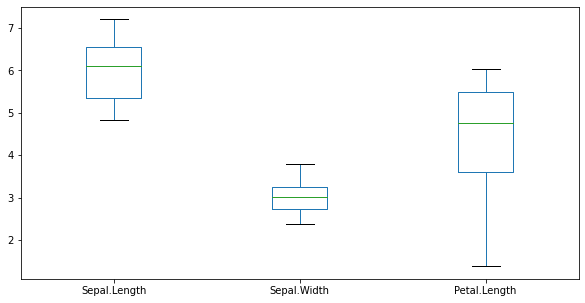

In [49]:
g.plot(kind='box',figsize=(10,5))

In [51]:
# Species, Petal.Width별 Sepal.Length의 평균
g = iris_df.groupby(['Species','Petal.Width'])['Sepal.Length'].mean()
g

Species     Petal.Width
setosa      0.1            4.820000
            0.2            4.972414
            0.3            4.971429
            0.4            5.300000
            0.5            5.100000
            0.6            5.000000
versicolor  1.0            5.414286
            1.1            5.400000
            1.2            5.780000
            1.3            5.884615
            1.4            6.357143
            1.5            6.190000
            1.6            6.100000
            1.7            6.700000
            1.8            5.900000
virginica   1.4            6.100000
            1.5            6.150000
            1.6            7.200000
            1.7            4.900000
            1.8            6.445455
            1.9            6.340000
            2.0            6.650000
            2.1            6.916667
            2.2            6.866667
            2.3            6.912500
            2.4            6.266667
            2.5            6.733333
Name

In [52]:
g.unstack()

Petal.Width,0.1,0.2,0.3,0.4,0.5,0.6,1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2.0,2.1,2.2,2.3,2.4,2.5
Species,,,,,,,,,,,,,,,,,,,,,,
setosa,4.82,4.972414,4.971429,5.3,5.1,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
versicolor,NaN,NaN,NaN,NaN,NaN,NaN,5.414286,5.4,5.78,5.884615,6.357143,6.19,6.1,6.7,5.900000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
virginica,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.100000,6.15,7.2,4.9,6.445455,6.34,6.65,6.916667,6.866667,6.9125,6.266667,6.733333


In [ ]:
pd.options.display.max_columns = 23

In [53]:
g.unstack().T

Species,setosa,versicolor,virginica
Petal.Width,,,
0.1,4.820000,NaN,NaN
0.2,4.972414,NaN,NaN
0.3,4.971429,NaN,NaN
0.4,5.300000,NaN,NaN
0.5,5.100000,NaN,NaN
0.6,5.000000,NaN,NaN
1.0,NaN,5.414286,NaN
1.1,NaN,5.400000,NaN
1.2,NaN,5.780000,NaN


## 8.2 그룹간 데이터 처리

In [54]:
iris_group = iris_df.groupby('Species')
iris_group

In [56]:
for idx, (speciesname, group) in enumerate(iris_group):
    print(idx, '번째 그룹은', speciesname)
    print(group)
    print('■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■')

0 번째 그룹은 setosa
    Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
0            5.1          3.5           1.4          0.2  setosa
1            4.9          3.0           1.4          0.2  setosa
2            4.7          3.2           1.3          0.2  setosa
3            4.6          3.1           1.5          0.2  setosa
4            5.0          3.6           1.4          0.2  setosa
5            5.4          3.9           1.7          0.4  setosa
6            4.6          3.4           1.4          0.3  setosa
7            5.0          3.4           1.5          0.2  setosa
8            4.4          2.9           1.4          0.2  setosa
9            4.9          3.1           1.5          0.1  setosa
10           5.4          3.7           1.5          0.2  setosa
11           4.8          3.4           1.6          0.2  setosa
12           4.8          3.0           1.4          0.1  setosa
13           4.3          3.0           1.1          0.1  setosa
14       

In [58]:
for idx, (speciesname, group) in enumerate(iris_group):
    print(idx, '번째 그룹은', speciesname)
    print(group.sample(5).sort_index())
    print('■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■')

0 번째 그룹은 setosa
    Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
1            4.9          3.0           1.4          0.2  setosa
22           4.6          3.6           1.0          0.2  setosa
36           5.5          3.5           1.3          0.2  setosa
38           4.4          3.0           1.3          0.2  setosa
47           4.6          3.2           1.4          0.2  setosa
■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■
1 번째 그룹은 versicolor
    Sepal.Length  Sepal.Width  Petal.Length  Petal.Width     Species
52           6.9          3.1           4.9          1.5  versicolor
82           5.8          2.7           3.9          1.2  versicolor
86           6.7          3.1           4.7          1.5  versicolor
88           5.6          3.0           4.1          1.3  versicolor
98           5.1          2.5           3.0          1.1  versicolor
■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■
2 번째 그룹은 virginica
     Sepal.Length  Sepal.Width  Petal.Length  P

## 8.3 데이터 프레임 그룹 인덱싱

In [63]:
# for idx, (speciesname, group) in enumerate(iris_group):
#     print(idx,'번째 그룹은 ',speciesname)
#     print(group.iloc[[1,11,21,31]])
#     print('★ ★ ★ ★ ★ ★ ★')
t = iris_df.groupby('Species').take([1,11,21,31])
t

Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
Species                                                             
setosa     1             4.9          3.0           1.4          0.2
           11            4.8          3.4           1.6          0.2
           21            5.1          3.7           1.5          0.4
           31            5.4          3.4           1.5          0.4
versicolor 51            6.4          3.2           4.5          1.5
           61            5.9          3.0           4.2          1.5
           71            6.1          2.8           4.0          1.3
           81            5.5          2.4           3.7          1.0
virginica  101           5.8          2.7           5.1          1.9
           111           6.4          2.7           5.3          1.9
           121           5.6          2.8           4.9          2.0
           131           7.9          3.8           6.4          2.0

In [65]:
t.loc['setosa']

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
1,4.9,3.0,1.4,0.2
11,4.8,3.4,1.6,0.2
21,5.1,3.7,1.5,0.4
31,5.4,3.4,1.5,0.4


## 8.4 레이블(원핫인코딩)

In [66]:
iris_df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [67]:
iris_df.Species.describe()

count           150
unique            3
top       virginica
freq             50
Name: Species, dtype: object

In [68]:
# 레이블(원핫인코딩)을 지원하는 패키지 이용
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
iris_df['target'] = le.fit_transform(iris_df.Species)
iris_df

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,target
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,2
146,6.3,2.5,5.0,1.9,virginica,2
147,6.5,3.0,5.2,2.0,virginica,2
148,6.2,3.4,5.4,2.3,virginica,2


# 9절 데이터 구조 변경

## 9.1 와이드포맷 vs. 롱 포맷
판다스 공식 문서에 나오는 melt : https://pandas.pydata.org/docs/user_guide/reshaping.html#reshaping-by-melt <br>
[Tidy Data 란?](https://vita.had.co.nz/papers/tidy-data.pdf) 7page

In [70]:
import statsmodels.api as sm
airqulity = sm.datasets.get_rdataset('airquality', package='datasets').data
airqulity

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5
...,...,...,...,...,...,...
148,30.0,193.0,6.9,70,9,26
149,NaN,145.0,13.2,77,9,27
150,14.0,191.0,14.3,75,9,28
151,18.0,131.0,8.0,76,9,29


## 9.2 melt를 이용한 언피벗팅(와이드포맷 데이터->롱포맷데이터)

In [71]:
airquality_melted = airqulity.melt(id_vars=['Month','Day'])
airquality_melted

,Month,Day,variable,value
0,5,1,Ozone,41.0
1,5,2,Ozone,36.0
2,5,3,Ozone,12.0
3,5,4,Ozone,18.0
4,5,5,Ozone,NaN
...,...,...,...,...
607,9,26,Temp,70.0
608,9,27,Temp,77.0
609,9,28,Temp,75.0
610,9,29,Temp,76.0


In [72]:
airqulity.melt(id_vars=['Month','Day'],
              var_name='변수',
              value_name='값')

,Month,Day,변수,값
0,5,1,Ozone,41.0
1,5,2,Ozone,36.0
2,5,3,Ozone,12.0
3,5,4,Ozone,18.0
4,5,5,Ozone,NaN
...,...,...,...,...
607,9,26,Temp,70.0
608,9,27,Temp,77.0
609,9,28,Temp,75.0
610,9,29,Temp,76.0


In [73]:
airquality_melted_sort = airquality_melted.sort_values(by=['Month','Day'])
airquality_melted_sort

,Month,Day,variable,value
0,5,1,Ozone,41.0
153,5,1,Solar.R,190.0
306,5,1,Wind,7.4
459,5,1,Temp,67.0
1,5,2,Ozone,36.0
...,...,...,...,...
610,9,29,Temp,76.0
152,9,30,Ozone,20.0
305,9,30,Solar.R,223.0
458,9,30,Wind,11.5


## 9.3 pivot_table을 이용한 피벗팅

In [76]:
# melt된 데이터 프레임 : airqulity_melted, airqulity_melted_sort
airquality_melted_sort.head(4)

,Month,Day,variable,value
0,5,1,Ozone,41.0
153,5,1,Solar.R,190.0
306,5,1,Wind,7.4
459,5,1,Temp,67.0


In [78]:
airqulity2 = airquality_melted.pivot_table(index=['Month','Day'],
                                          columns=['variable'],
                                          values=['value'])
airqulity2.head()

value                    
variable  Ozone Solar.R  Temp  Wind
Month Day                          
5     1    41.0   190.0  67.0   7.4
      2    36.0   118.0  72.0   8.0
      3    12.0   149.0  74.0  12.6
      4    18.0   313.0  62.0  11.5
      5     NaN     NaN  56.0  14.3

In [79]:
airqulity2.index

MultiIndex([(5,  1),
            (5,  2),
            (5,  3),
            (5,  4),
            (5,  5),
            (5,  6),
            (5,  7),
            (5,  8),
            (5,  9),
            (5, 10),
            ...
            (9, 21),
            (9, 22),
            (9, 23),
            (9, 24),
            (9, 25),
            (9, 26),
            (9, 27),
            (9, 28),
            (9, 29),
            (9, 30)],
           names=['Month', 'Day'], length=153)

In [80]:
# 행이름을 데이터에 편입
airqulity2 = airqulity2.reset_index(level=['Month','Day'], col_level=1)
airqulity2.head()

value                    
variable Month Day Ozone Solar.R  Temp  Wind
0            5   1  41.0   190.0  67.0   7.4
1            5   2  36.0   118.0  72.0   8.0
2            5   3  12.0   149.0  74.0  12.6
3            5   4  18.0   313.0  62.0  11.5
4            5   5   NaN     NaN  56.0  14.3

In [81]:
airqulity2.columns = airqulity2.columns.droplevel(level=0)
airqulity2

variable,Month,Day,Ozone,Solar.R,Temp,Wind
0,5,1,41.0,190.0,67.0,7.4
1,5,2,36.0,118.0,72.0,8.0
2,5,3,12.0,149.0,74.0,12.6
3,5,4,18.0,313.0,62.0,11.5
4,5,5,NaN,NaN,56.0,14.3
...,...,...,...,...,...,...
148,9,26,30.0,193.0,70.0,6.9
149,9,27,NaN,145.0,77.0,13.2
150,9,28,14.0,191.0,75.0,14.3
151,9,29,18.0,131.0,76.0,8.0


In [82]:
airquality_melted_sort.head(1)

,Month,Day,variable,value
0,5,1,Ozone,41.0


In [88]:
airqulity3 = airquality_melted_sort.pivot_table(index=['Month','Day'],
                                               columns=['variable'],
                                               values=['value'])
airqulity3.head(4)

value                    
variable  Ozone Solar.R  Temp  Wind
Month Day                          
5     1    41.0   190.0  67.0   7.4
      2    36.0   118.0  72.0   8.0
      3    12.0   149.0  74.0  12.6
      4    18.0   313.0  62.0  11.5

In [89]:
airqulity3 = airqulity3.reset_index(level=['Month','Day'], col_level=1)
airqulity3

value                    
variable Month Day Ozone Solar.R  Temp  Wind
0            5   1  41.0   190.0  67.0   7.4
1            5   2  36.0   118.0  72.0   8.0
2            5   3  12.0   149.0  74.0  12.6
3            5   4  18.0   313.0  62.0  11.5
4            5   5   NaN     NaN  56.0  14.3
..         ...  ..   ...     ...   ...   ...
148          9  26  30.0   193.0  70.0   6.9
149          9  27   NaN   145.0  77.0  13.2
150          9  28  14.0   191.0  75.0  14.3
151          9  29  18.0   131.0  76.0   8.0
152          9  30  20.0   223.0  68.0  11.5

[153 rows x 6 columns]

In [90]:
airqulity3.columns = airqulity3.columns.droplevel(level=0)
airqulity3

variable,Month,Day,Ozone,Solar.R,Temp,Wind
0,5,1,41.0,190.0,67.0,7.4
1,5,2,36.0,118.0,72.0,8.0
2,5,3,12.0,149.0,74.0,12.6
3,5,4,18.0,313.0,62.0,11.5
4,5,5,NaN,NaN,56.0,14.3
...,...,...,...,...,...,...
148,9,26,30.0,193.0,70.0,6.9
149,9,27,NaN,145.0,77.0,13.2
150,9,28,14.0,191.0,75.0,14.3
151,9,29,18.0,131.0,76.0,8.0


In [ ]:
# 2013부터 2015(df_first) : 전국 평균 평당 분양가격(2013년 9월부터 2015년 8월까지).csv
# 2015부터 2021(df_last) : 주택도시보증공사_전국 신규 민간아파트 분양가격 동향_20210531.csv
# concat을 2013부터 2015까지의 지역명,연도월(2015년10월), 평당분양가격으로 합쳐 
        # 하나의 DataFrame으로 생성합니다
    # hint : info(), isnull().sum()
         # melt, pd.to_numeric(df_last['열이름'], erros='coerce'), 
         #   df_last의 연도와 월 컬럼을 연결하여 2015년10월 
         #   dataframe['열이름'].str.find('d')
         #   pd.concat([new_first, new_last], axis=?)
         #   astype('str'), drop(['',''],axis=?)

In [81]:
import pandas as pd
df_first = pd.read_csv('c:/bigdata/Download/sharedBigdata/전국 평균 평당 분양가격(2013년 9월부터 2015년 8월까지).csv',
                     encoding='cp949')
df_last = pd.read_csv('c:/bigdata/Download/sharedBigdata/주택도시보증공사_전국 신규 민간아파트 분양가격 동향_20210531.csv',
                     encoding='cp949')
df_first.head(1)

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,...,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
0,서울,18189,17925,17925,18016,18098,19446,18867,18742,19274,...,20242,20269,20670,20670,19415,18842,18367,18374,18152,18443


In [82]:
df_last.sample()

,지역명,규모구분,연도,월,분양가격(㎡)
5065,충북,모든면적,2020,9,2394


In [83]:
new_first = df_first.melt(id_vars="지역", var_name="연도월", value_name="평당분양가격")
new_first.head()

,지역,연도월,평당분양가격
0,서울,2013년12월,18189
1,부산,2013년12월,8111
2,대구,2013년12월,8080
3,인천,2013년12월,10204
4,광주,2013년12월,6098


In [84]:
new_first.columns = ['지역명', '연도월','평당분양가격']
new_first

,지역명,연도월,평당분양가격
0,서울,2013년12월,18189
1,부산,2013년12월,8111
2,대구,2013년12월,8080
3,인천,2013년12월,10204
4,광주,2013년12월,6098
...,...,...,...
352,전북,2015년8월,6580
353,전남,2015년8월,6289
354,경북,2015년8월,7037
355,경남,2015년8월,7665


In [85]:
# df_last 전처리
df_last.head()

,지역명,규모구분,연도,월,분양가격(㎡)
0,서울,모든면적,2015,10,5841
1,서울,전용면적 60㎡이하,2015,10,5652
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721
4,서울,전용면적 102㎡초과,2015,10,5879


In [86]:
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5780 entries, 0 to 5779
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   지역명      5780 non-null   object
 1   규모구분     5780 non-null   object
 2   연도       5780 non-null   int64 
 3   월        5780 non-null   int64 
 4   분양가격(㎡)  5331 non-null   object
dtypes: int64(2), object(3)
memory usage: 225.9+ KB


In [87]:
df_last.isnull().sum() # 결측치 갯수 확인

지역명          0
규모구분         0
연도           0
월            0
분양가격(㎡)    449
dtype: int64

In [89]:
df_last.isna().sum()

지역명          0
규모구분         0
연도           0
월            0
분양가격(㎡)    449
dtype: int64

In [91]:
df_last.notnull().sum() # 결측치가 아닌 데이터 갯수

지역명        5780
규모구분       5780
연도         5780
월          5780
분양가격(㎡)    5331
dtype: int64

In [93]:
df_last["연도월"] = df_last["연도"].astype('str') + "년" + df_last["월"].astype('str')+"월"

In [94]:
df_last.head()

,지역명,규모구분,연도,월,분양가격(㎡),연도월
0,서울,모든면적,2015,10,5841,2015년10월
1,서울,전용면적 60㎡이하,2015,10,5652,2015년10월
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882,2015년10월
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721,2015년10월
4,서울,전용면적 102㎡초과,2015,10,5879,2015년10월


In [102]:
len(df_last[df_last['분양가격(㎡)'].str.strip() == ''])

16

In [101]:
df_last[(df_last['분양가격(㎡)'].str.find(',') != -1) & df_last['분양가격(㎡)'].notnull()]  # 12,250

,지역명,규모구분,연도,월,분양가격(㎡),연도월
2125,서울,모든면적,2017,11,"6,657",2017년11월
2126,서울,전용면적 60㎡이하,2017,11,"6,931",2017년11월
2127,서울,전용면적 60㎡초과 85㎡이하,2017,11,"5,899",2017년11월
2128,서울,전용면적 85㎡초과 102㎡이하,2017,11,"7,311",2017년11월
2129,서울,전용면적 102㎡초과,2017,11,"6,880",2017년11월
...,...,...,...,...,...,...
2203,경남,전용면적 85㎡초과 102㎡이하,2017,11,"2,914",2017년11월
2204,경남,전용면적 102㎡초과,2017,11,"2,838",2017년11월
2205,제주,모든면적,2017,11,"3,560",2017년11월
2206,제주,전용면적 60㎡이하,2017,11,"5,380",2017년11월


In [ ]:
df_last['분양가격(㎡)'] = df_last['분양가격(㎡)'].astype('float') # 에러나는 이유는 윗셀

In [105]:
df_last['분양가격(㎡)'] = pd.to_numeric(df_last['분양가격(㎡)'], errors='coerce')

In [107]:
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5780 entries, 0 to 5779
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   지역명      5780 non-null   object 
 1   규모구분     5780 non-null   object 
 2   연도       5780 non-null   int64  
 3   월        5780 non-null   int64  
 4   분양가격(㎡)  5239 non-null   float64
 5   연도월      5780 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 271.1+ KB


In [109]:
df_last.isnull().sum()

지역명          0
규모구분         0
연도           0
월            0
분양가격(㎡)    541
연도월          0
dtype: int64

In [110]:
df_last['평당분양가격'] = df_last['분양가격(㎡)']*3.3
df_last.head()

,지역명,규모구분,연도,월,분양가격(㎡),연도월,평당분양가격
0,서울,모든면적,2015,10,5841.0,2015년10월,19275.3
1,서울,전용면적 60㎡이하,2015,10,5652.0,2015년10월,18651.6
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882.0,2015년10월,19410.6
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721.0,2015년10월,18879.3
4,서울,전용면적 102㎡초과,2015,10,5879.0,2015년10월,19400.7


In [111]:
# 모든면적만
new_last = df_last[df_last['규모구분']=='모든면적']
new_last.sample(3)

,지역명,규모구분,연도,월,분양가격(㎡),연도월,평당분양가격
3015,세종,모든면적,2018,9,3148.0,2018년9월,10388.4
4680,인천,모든면적,2020,5,4345.0,2020년5월,14338.5
4130,충북,모든면적,2019,10,2272.0,2019년10월,7497.6


In [112]:
new_last = new_last.drop(['규모구분','연도','월','분양가격(㎡)'], axis=1)
# new_last.drop(['규모구분','연도','월','분양가격(㎡)'], axis=1, inplace=True)

In [114]:
# concat
result = pd.concat([new_first, new_last], axis=0) # axis=0이 기본값이라 생략 가능
result

,지역명,연도월,평당분양가격
0,서울,2013년12월,18189.0
1,부산,2013년12월,8111.0
2,대구,2013년12월,8080.0
3,인천,2013년12월,10204.0
4,광주,2013년12월,6098.0
...,...,...,...
5755,전북,2021년5월,8853.9
5760,전남,2021년5월,9659.1
5765,경북,2021년5월,9989.1
5770,경남,2021년5월,10197.0


### pivot_table(), pivot() 함수의 차이

In [2]:
import numpy as np
year = [2020,2020,2020,2021,2021,2021]
mon  = [1,2,3] *2
latte     = range(400,406)
americano = [500,483,484,470,486,488]
mocha     = [350,299,300,301,302,300]
sales = pd.DataFrame(np.c_[year, mon, latte, americano, mocha],
                    columns=['year','mon','latte','americano','mocha'])
sales

,year,mon,latte,americano,mocha
0,2020,1,400,500,350
1,2020,2,401,483,299
2,2020,3,402,484,300
3,2021,1,403,470,301
4,2021,2,404,486,302
5,2021,3,405,488,300


In [3]:
t = pd.pivot_table(sales, index='year', values=['latte','americano','mocha'],
              aggfunc=sum)
t = sales.pivot_table(index='year', values=['latte','americano','mocha'],
              aggfunc=sum)
t

,americano,latte,mocha
year,,,
2020,1467,1203,949
2021,1444,1212,903


In [13]:
sales.pivot_table(index='year', columns='mon', values='latte')

mon,1,2,3
year,,,
2020,400,401,402
2021,403,404,405


In [14]:
sales.pivot_table(index='year', columns='mon', values=['latte']) #하나라도 []안에 담으면 위에 latte 표시

latte          
mon      1    2    3
year                
2020   400  401  402
2021   403  404  405

In [120]:
t.loc[2020]

americano    1467
latte        1203
mocha         949
Name: 2020, dtype: int32

In [124]:
latte_sales = sales.loc[:,'year':'latte']
latte_sales

,year,mon,latte
0,2020,1,400
1,2020,2,401
2,2020,3,402
3,2021,1,403
4,2021,2,404
5,2021,3,405


In [125]:
latte_sales.pivot(index='year', columns='mon')

latte          
mon      1    2    3
year                
2020   400  401  402
2021   403  404  405

# 10절 데이터프레임에 함수적용시키기

## 10.1 apply
- 데이터 프레임이나 시리즈에 각 열 또는 행에 함수를 적용

In [1]:
from statsmodels.api import datasets
iris_df = datasets.get_rdataset('iris', package='datasets').data
iris_df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [129]:
X = iris_df.loc[:,'Sepal.Length':'Petal.Width']
X.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [131]:
X = iris_df.iloc[:,:-1]
X

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [132]:
import numpy as np
np.average([1,2,3,4])

2.5

In [138]:
np.sum([1.9, 1.8])

3.7

In [137]:
np.round([1.555, 2.855], 2)

array([1.56, 2.86])

In [141]:
X.apply(np.round)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,5.0,4.0,1.0,0.0
1,5.0,3.0,1.0,0.0
2,5.0,3.0,1.0,0.0
3,5.0,3.0,2.0,0.0
4,5.0,4.0,1.0,0.0
...,...,...,...,...
145,7.0,3.0,5.0,2.0
146,6.0,2.0,5.0,2.0
147,6.0,3.0,5.0,2.0
148,6.0,3.0,5.0,2.0


In [142]:
X.apply(np.sum, axis=0) # 열별 sum

Sepal.Length    876.5
Sepal.Width     458.6
Petal.Length    563.7
Petal.Width     179.9
dtype: float64

In [143]:
X.apply(np.sum, axis=1) # 행별 sum

0      10.2
1       9.5
2       9.4
3       9.4
4      10.2
       ... 
145    17.2
146    15.7
147    16.7
148    17.3
149    15.8
Length: 150, dtype: float64

In [145]:
# 각 데이터와 평균과의 거리를 출력
avg = X.apply(np.average)
avg

Sepal.Length    5.843333
Sepal.Width     3.057333
Petal.Length    3.758000
Petal.Width     1.199333
dtype: float64

In [148]:
# X.loc[0]의 평균값과의 거리 계산
X.loc[0] - avg

Sepal.Length   -0.743333
Sepal.Width     0.442667
Petal.Length   -2.358000
Petal.Width    -0.999333
dtype: float64

In [149]:
def fun(x):
    return x-avg
fun(X.loc[0])

Sepal.Length   -0.743333
Sepal.Width     0.442667
Petal.Length   -2.358000
Petal.Width    -0.999333
dtype: float64

In [151]:
X.apply(lambda x : x-avg, axis=1)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,-0.743333,0.442667,-2.358,-0.999333
1,-0.943333,-0.057333,-2.358,-0.999333
2,-1.143333,0.142667,-2.458,-0.999333
3,-1.243333,0.042667,-2.258,-0.999333
4,-0.843333,0.542667,-2.358,-0.999333
...,...,...,...,...
145,0.856667,-0.057333,1.442,1.100667
146,0.456667,-0.557333,1.242,0.700667
147,0.656667,-0.057333,1.442,0.800667
148,0.356667,0.342667,1.642,1.100667


In [155]:
# 각 데이터와 평균과의 거리를 리스트 형태로 출력
X.apply(lambda x : list(round(x-avg, 2)), axis=1)

0       [-0.74, 0.44, -2.36, -1.0]
1      [-0.94, -0.06, -2.36, -1.0]
2       [-1.14, 0.14, -2.46, -1.0]
3       [-1.24, 0.04, -2.26, -1.0]
4       [-0.84, 0.54, -2.36, -1.0]
                  ...             
145       [0.86, -0.06, 1.44, 1.1]
146       [0.46, -0.56, 1.24, 0.7]
147       [0.66, -0.06, 1.44, 0.8]
148        [0.36, 0.34, 1.64, 1.1]
149       [0.06, -0.06, 1.34, 0.6]
Length: 150, dtype: object

## 10.2 applymap
- apply : 행 또는 열단위로 함수 적용(데이터프레임이나 시리즈 적용 가능)
- applymap : 각 요소 하나하나 별로 적용(데이터프레임에서만 가능)
- map : 각 요소별로 적용(시리즈에서만 가능)

In [157]:
X.applymap(np.round)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,5.0,4.0,1.0,0.0
1,5.0,3.0,1.0,0.0
2,5.0,3.0,1.0,0.0
3,5.0,3.0,2.0,0.0
4,5.0,4.0,1.0,0.0
...,...,...,...,...
145,7.0,3.0,5.0,2.0
146,6.0,2.0,5.0,2.0
147,6.0,3.0,5.0,2.0
148,6.0,3.0,5.0,2.0


In [159]:
X.applymap(lambda x : x**2)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,26.01,12.25,1.96,0.04
1,24.01,9.00,1.96,0.04
2,22.09,10.24,1.69,0.04
3,21.16,9.61,2.25,0.04
4,25.00,12.96,1.96,0.04
...,...,...,...,...
145,44.89,9.00,27.04,5.29
146,39.69,6.25,25.00,3.61
147,42.25,9.00,27.04,4.00
148,38.44,11.56,29.16,5.29


## 10.3 map
- 시리즈 타입의 벡터만 가능

In [161]:
x = pd.Series(['홍길동',20,'서울시 마포구'], index=['이름','나이','주소'])
x

이름        홍길동
나이         20
주소    서울시 마포구
dtype: object

In [162]:
def my_func(data):
    return data, len(str(data))

In [164]:
my_func('서울시 마포구')

('서울시 마포구', 7)

In [165]:
x.map(my_func)

이름        (홍길동, 3)
나이         (20, 2)
주소    (서울시 마포구, 7)
dtype: object

In [167]:
x.map(lambda data : (data, len(str(data))) )

이름        (홍길동, 3)
나이         (20, 2)
주소    (서울시 마포구, 7)
dtype: object

In [170]:
s = pd.Series([1, 2, 3, 4, None])
s

0    1.0
1    2.0
2    3.0
3    4.0
4    NaN
dtype: float64

In [171]:
s.map(lambda x : (x, x**2))

0     (1.0, 1.0)
1     (2.0, 4.0)
2     (3.0, 9.0)
3    (4.0, 16.0)
4     (nan, nan)
dtype: object

In [172]:
# 결측치는 연산적용이 안되도록
s.map(lambda x : (x, x**2), na_action="ignore")

0     (1.0, 1.0)
1     (2.0, 4.0)
2     (3.0, 9.0)
3    (4.0, 16.0)
4            NaN
dtype: object

In [173]:
new_first

,지역명,연도월,평당분양가격
0,서울,2013년12월,18189
1,부산,2013년12월,8111
2,대구,2013년12월,8080
3,인천,2013년12월,10204
4,광주,2013년12월,6098
...,...,...,...
352,전북,2015년8월,6580
353,전남,2015년8월,6289
354,경북,2015년8월,7037
355,경남,2015년8월,7665


In [179]:
data = "2013년12월"
int(data.split('년')[0]) # 년도를 int로

2013

In [182]:
int(data.split('년')[-1].replace('월','')) # 월을 int로

'12'

In [184]:
new_first['연도'] = new_first['연도월'].apply(lambda data : int(data.split('년')[0]))

In [185]:
new_first['월'] = new_first["연도월"].apply(lambda data : 
                                       int(data.split('년')[-1].replace('월','')))

In [186]:
new_first.head()

,지역명,연도월,평당분양가격,연도,월
0,서울,2013년12월,18189,2013,12
1,부산,2013년12월,8111,2013,12
2,대구,2013년12월,8080,2013,12
3,인천,2013년12월,10204,2013,12
4,광주,2013년12월,6098,2013,12


# 11절. 일괄변경하기(결측치나 특정값)

## 11.1 fillna (결측치를 어떤 값으로 바꿈)

In [187]:
df = pd.DataFrame([[np.nan, 2, np.nan, 0],
                   [3, 4, np.nan, 1],
                   [np.nan, 3, np.nan, 5],
                   [np.nan, 3, np.nan, 4]],
                   columns=list('ABCD'))
df

,A,B,C,D
0,NaN,2,NaN,0
1,3.0,4,NaN,1
2,NaN,3,NaN,5
3,NaN,3,NaN,4


In [188]:
# 모든 결측치를 무조건 0으로 채움
df.fillna(0)

,A,B,C,D
0,0.0,2,0.0,0
1,3.0,4,0.0,1
2,0.0,3,0.0,5
3,0.0,3,0.0,4


In [189]:
# 결측치를 이전값이나 다음값으로 채움
    # method = pad/ffill : 결측치를 이전값으로 대체
    # method = backfill/bfill : 결측치를 다음값으로 대체
df.fillna(method='ffill')

,A,B,C,D
0,NaN,2,NaN,0
1,3.0,4,NaN,1
2,3.0,3,NaN,5
3,3.0,3,NaN,4


In [190]:
df.fillna(method='bfill')

,A,B,C,D
0,3.0,2,NaN,0
1,3.0,4,NaN,1
2,NaN,3,NaN,5
3,NaN,3,NaN,4


In [191]:
# 결측치 특정대체값으로 바꿈
values = {'A':99, 'B':50, 'C':0, 'D':95} # 열별 결측치 대체값
df.fillna(value=values)

,A,B,C,D
0,99.0,2,0.0,0
1,3.0,4,0.0,1
2,99.0,3,0.0,5
3,99.0,3,0.0,4


In [192]:
df.fillna(value=df.mean()) # 모두 결측치인 C컬럼은 결측치 대체 안 됨

,A,B,C,D
0,3.0,2,NaN,0
1,3.0,4,NaN,1
2,3.0,3,NaN,5
3,3.0,3,NaN,4


In [194]:
df.fillna(value=values, limit=3) # 3번째 결측치까지만 대체

,A,B,C,D
0,99.0,2,0.0,0
1,3.0,4,0.0,1
2,99.0,3,0.0,5
3,99.0,3,NaN,4


## 11.2 replace(to_value, new_value, inplace=False)
    - to_value를 new_value로 변경
    - inplace=False : 변경된 내용을 반환. 데이터프레임 적용되지 않음
    - inplace=True : 변경된 내용을 반환하지 않고, 데이터프레임에 적용
    - 정규표현식을 이용 가능

In [199]:
s = pd.Series([0,1,2,3,4,None])
s.replace(np.nan, 0, inplace=True)
s.replace([0,1], 5) # 0과1을 5로 변경

0    5.0
1    5.0
2    2.0
3    3.0
4    4.0
5    5.0
dtype: float64

In [201]:
s = pd.Series([0,1,2,3,4,None])
s.replace([0,1,2],[100,101,102])
s.replace(range(0,3),range(100, 103))

0    100.0
1    101.0
2    102.0
3      3.0
4      4.0
5      NaN
dtype: float64

In [202]:
df = pd.DataFrame({'A':['bat','foo','bait'],
                   'B':['abc','bar','xyz']})
df

,A,B
0,bat,abc
1,foo,bar
2,bait,xyz


In [203]:
# to_value에 값, 정규표현식(regex=True인자 추가)
df.replace({'A':'bat','B':'xyz'}, 'XXX')

,A,B
0,XXX,abc
1,foo,bar
2,bait,XXX


In [204]:
# to_value에 값, 정규표현식(regex=True인자 추가)
df.replace(r'^ba.$', 'NEW', regex=True)

,A,B
0,NEW,abc
1,foo,NEW
2,bait,xyz


In [205]:
df.replace(r'^ba.+$', 'NEW', regex=True)

,A,B
0,NEW,abc
1,foo,NEW
2,NEW,xyz


## 11.3 where(조건), mask(조건)
    * where(조건) : 조건이 만족하는 요소는 그대로 출력. (반)mask

In [207]:
s = pd.Series(range(10,15))
s

0    10
1    11
2    12
3    13
4    14
dtype: int64

In [209]:
s.where(s>11) # 조건에 만족하는 값만 보이고 만족하지 않으면 결측치로

0     NaN
1     NaN
2    12.0
3    13.0
4    14.0
dtype: float64

In [210]:
s.where(s>11, -99)# 조건에 만족하는 값만 보이고 만족하지 않으면 -99로

0   -99
1   -99
2    12
3    13
4    14
dtype: int64

In [212]:
s.mask(s>11) # 조건에 만족하는 경우만 결측치. 만족되지 않으면 값보임

0    10.0
1    11.0
2     NaN
3     NaN
4     NaN
dtype: float64

In [213]:
s.mask(s>11, -s)

0    10
1    11
2   -12
3   -13
4   -14
dtype: int64

## 11.4 dropna
    - 결측치가 있는 데이터 누락 시킴

In [214]:
df = pd.DataFrame({'name':['박','김','최',np.nan],
                   'age':[np.nan, 20, 30, np.nan],
                   'born':['서울','부산',np.nan,np.nan]})
df

,name,age,born
0,박,NaN,서울
1,김,20.0,부산
2,최,30.0,NaN
3,NaN,NaN,NaN


In [215]:
df.dropna() # 결측치가 하나라도 있는 행은 제거

,name,age,born
1,김,20.0,부산


In [218]:
df.dropna(how='all', inplace=True)

In [219]:
df

,name,age,born
0,박,NaN,서울
1,김,20.0,부산
2,최,30.0,NaN


In [220]:
df.dropna(axis=1, how='any')

,name
0,박
1,김
2,최


# 12절 시리즈(1차원데이터)
    * 데이터프레임(2차원데이터)

In [223]:
s = pd.Series([1000,7000,5000,2000,1500],
             index=['apple','banana','mango','cherry','orange'])
s

apple     1000
banana    7000
mango     5000
cherry    2000
orange    1500
dtype: int64

In [224]:
s['apple']

1000

In [225]:
s['apple':'mango'] # mango 포함

apple     1000
banana    7000
mango     5000
dtype: int64

In [227]:
s['watermelon'] = 10000 # 시리즈에 데이터 추가
s

apple          1000
banana         7000
mango          5000
cherry         2000
orange         1500
watermelon    10000
dtype: int64

In [230]:
s.drop('watermelon', inplace=True)
s

apple     1000
banana    7000
mango     5000
cherry    2000
orange    1500
dtype: int64

In [231]:
s.sort_values() #값을 기준으로 정렬 : 오름차순

apple     1000
orange    1500
cherry    2000
mango     5000
banana    7000
dtype: int64

In [232]:
s.sort_values(ascending=False) #값을 기준으로 정렬 : 내림차순

banana    7000
mango     5000
cherry    2000
orange    1500
apple     1000
dtype: int64

In [233]:
s.sort_index()

apple     1000
banana    7000
cherry    2000
mango     5000
orange    1500
dtype: int64

In [235]:
s.to_frame() # 시리즈를 데이터 프레임으로 변환

,0
apple,1000
banana,7000
mango,5000
cherry,2000
orange,1500


In [236]:
s.to_frame(name='price')

,price
apple,1000
banana,7000
mango,5000
cherry,2000
orange,1500


In [237]:
### 예제 : iris 결측치를 random하게 인위적으로 열마다 20개씩 할당한 후 평균값으로 대체

In [46]:
# iris 가져오는 방법 1
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head(1)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa


In [246]:
# iris 가져오는 방법 2
from sklearn import datasets
iris_dic = datasets.load_iris()
x = pd.DataFrame(iris_dic.data, 
        columns=[col[:-4].strip().replace(' ','_') for col in iris_dic.feature_names])
y = pd.DataFrame(iris_dic.target_names[iris_dic.target], columns=['species'])
iris = pd.concat([x,y], axis=1)
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [247]:
# iris 가져오는 방법 3
from statsmodels.api import datasets
iris = datasets.get_rdataset('iris').data
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [276]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
iris.isnull().sum() # 결측치 확인

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [5]:
iris.shape

(150, 5)

In [47]:
# 열마다 임의의 행에 인위적으로 결측치 할당
import random
random.seed(12)
for col in range(iris.shape[1]-1):
    iris.iloc[random.sample(range(len(iris)), 20), col] = np.nan

In [273]:
# 최대한 출력할 수 있는 행 수를 조절
pd.options.display.max_rows=151

In [279]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,NaN,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,NaN,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,NaN,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,NaN,setosa
7,5.0,3.4,NaN,NaN,setosa
8,4.4,2.9,1.4,NaN,setosa
9,4.9,3.1,1.5,0.1,setosa


In [7]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  130 non-null    float64
 1   sepal_width   130 non-null    float64
 2   petal_length  130 non-null    float64
 3   petal_width   130 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
iris.isna().sum()

sepal_length    20
sepal_width     20
petal_length    20
petal_width     20
species          0
dtype: int64

In [48]:
pd.options.display.max_rows=10

In [49]:
# 결측치가 하나라도 있는 행 출력
iris[iris['sepal_length'].isnull() |
     iris['sepal_width'].isnull()  |
     iris['petal_length'].isnull() |
     iris['petal_width'].isnull()]

,sepal_length,sepal_width,petal_length,petal_width,species
0,NaN,3.5,1.4,0.2,setosa
2,NaN,3.2,1.3,0.2,setosa
4,5.0,NaN,1.4,0.2,setosa
6,4.6,3.4,1.4,NaN,setosa
7,5.0,3.4,NaN,NaN,setosa
...,...,...,...,...,...
138,6.0,NaN,NaN,1.8,virginica
140,6.7,3.1,5.6,NaN,virginica
142,NaN,NaN,NaN,1.9,virginica
146,6.3,2.5,5.0,NaN,virginica


In [173]:
# 결측치를 평균값으로 대체(열마다 평균값->결측치를 평균값으로 대체)
avg = iris.mean(axis=0)
#     iris.loc[:,'sepal_length':'petal_width'].apply(np.average)은 결측치가 있어서 안 됨
avg

sepal_length    5.830769
sepal_width     3.052308
petal_length    3.753846
petal_width     1.183077
dtype: float64

In [51]:
# iris.fillna(value=avg, inplace=True)
iris = iris.fillna(value=avg)
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.830769,3.500000,1.4,0.200000,setosa
1,4.900000,3.000000,1.4,0.200000,setosa
2,5.830769,3.200000,1.3,0.200000,setosa
3,4.600000,3.100000,1.5,0.200000,setosa
4,5.000000,3.052308,1.4,0.200000,setosa
...,...,...,...,...,...
145,6.700000,3.000000,5.2,2.300000,virginica
146,6.300000,2.500000,5.0,1.183077,virginica
147,6.500000,3.052308,5.2,2.000000,virginica
148,6.200000,3.400000,5.4,2.300000,virginica


In [52]:
# 결측치가 평균값으로 대체되었는지 확인
iris.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

# 13절 연습문제

In [31]:
import seaborn as sns
iris = sns.load_dataset("iris")
type(iris)

pandas.core.frame.DataFrame

In [53]:
# 1. 처음 다섯 개 행만 출력
iris.head()
iris.loc[:5]
iris.iloc[:5]
iris[:5]

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.830769,3.500000,1.4,0.2,setosa
1,4.900000,3.000000,1.4,0.2,setosa
2,5.830769,3.200000,1.3,0.2,setosa
3,4.600000,3.100000,1.5,0.2,setosa
4,5.000000,3.052308,1.4,0.2,setosa


In [175]:
# 2.Iris 데이터를 독립변수 X와 종속변수 y로 나누세요. 독립변수는 Species 열입니다
# iloc이용
X = iris.iloc[:,:-1]
y = iris.iloc[:,-1]
# loc이용
X = iris.loc[:,'sepal_length':'petal_width']
y=iris.loc[:,'species']
# 위의 어떤 방법을 쓰던 y는 Series
y=iris.loc[:,'species'].to_frame()
print(type(X))
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [35]:
# 3.iris 데이터에서 처음 50개 행을 빼내서 temp 변수에 저장하세요
temp = iris.head(50)
temp = iris.iloc[:50]
temp = iris[:50]

In [177]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  50 non-null     float64
 1   sepal_width   50 non-null     float64
 2   petal_length  50 non-null     float64
 3   petal_width   50 non-null     float64
 4   species       50 non-null     object 
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [42]:
# 4. 모든 열에 대하여 요약정보 : temp.describe()는 숫자열만 요약정보 출력됨
temp.describe(include=['float64','object'])
temp.describe(include='all')

,sepal_length,sepal_width,petal_length,petal_width,species
count,50.00000,50.000000,50.000000,50.000000,50
unique,NaN,NaN,NaN,NaN,1
top,NaN,NaN,NaN,NaN,setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.00600,3.428000,1.462000,0.246000,NaN
std,0.35249,0.379064,0.173664,0.105386,NaN
min,4.30000,2.300000,1.000000,0.100000,NaN
25%,4.80000,3.200000,1.400000,0.200000,NaN
50%,5.00000,3.400000,1.500000,0.200000,NaN
75%,5.20000,3.675000,1.575000,0.300000,NaN


In [43]:
# 5. versicolor 종만
iris_versicolor = iris.loc[iris['species']=='versicolor']
iris_versicolor = iris.loc[iris.species=='versicolor']
iris_versicolor = iris[iris.species=='versicolor']
iris_versicolor

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
53,5.5,2.3,4.0,1.3,versicolor
54,6.5,2.8,4.6,1.5,versicolor
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,versicolor
96,5.7,2.9,4.2,1.3,versicolor
97,6.2,2.9,4.3,1.3,versicolor
98,5.1,2.5,3.0,1.1,versicolor


In [180]:
# 6. X와 y합하기
import pandas as pd
pd.concat([X,y], axis=1)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.830769,3.500000,1.4,0.200000,setosa
1,4.900000,3.000000,1.4,0.200000,setosa
2,5.830769,3.200000,1.3,0.200000,setosa
3,4.600000,3.100000,1.5,0.200000,setosa
4,5.000000,3.052308,1.4,0.200000,setosa
...,...,...,...,...,...
145,6.700000,3.000000,5.2,2.300000,virginica
146,6.300000,2.500000,5.0,1.183077,virginica
147,6.500000,3.052308,5.2,2.000000,virginica
148,6.200000,3.400000,5.4,2.300000,virginica


In [181]:
#7. 열별 평균값
iris.mean()
iris.iloc[:,:-1].apply(np.average, axis=0) # 결측치가 있을 경우 X

sepal_length    5.830769
sepal_width     3.052308
petal_length    3.753846
petal_width     1.183077
dtype: float64

In [182]:
#8. 열들 사이의 상관계수
r = iris.corr()
r

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.150155,0.716172,0.677390
sepal_width,-0.150155,1.000000,-0.388614,-0.348304
petal_length,0.716172,-0.388614,1.000000,0.843277
petal_width,0.677390,-0.348304,0.843277,1.000000


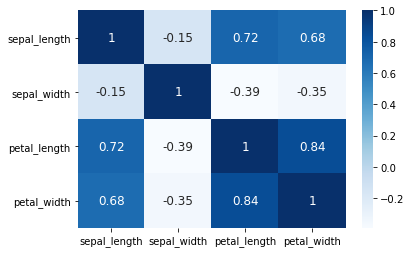

In [191]:
# 상관계수를 시각화
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(r, annot=True, cmap='Blues', annot_kws={'size':12})
plt.show()

In [65]:
# 9. 각 요소들과 변수별 평균차이
iris.mean()

sepal_length    5.830769
sepal_width     3.052308
petal_length    3.753846
petal_width     1.183077
dtype: float64

In [66]:
iris.iloc[:,:-1].apply(lambda x : x-iris.mean(), axis=1)

,sepal_length,sepal_width,petal_length,petal_width
0,2.664535e-15,0.447692,-2.353846,-9.830769e-01
1,-9.307692e-01,-0.052308,-2.353846,-9.830769e-01
2,2.664535e-15,0.147692,-2.453846,-9.830769e-01
3,-1.230769e+00,0.047692,-2.253846,-9.830769e-01
4,-8.307692e-01,0.000000,-2.353846,-9.830769e-01
...,...,...,...,...
145,8.692308e-01,-0.052308,1.446154,1.116923e+00
146,4.692308e-01,-0.552308,1.246154,-4.440892e-16
147,6.692308e-01,0.000000,1.446154,8.169231e-01
148,3.692308e-01,0.347692,1.646154,1.116923e+00


In [192]:
# 10. 종별 평균
iris.groupby(['species']).mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.095077,3.366369,1.738462,0.355969
versicolor,5.907538,2.792185,4.251538,1.301631
virginica,6.489692,2.998369,5.271538,1.891631


In [73]:
iris.pivot_table(index='species', 
        values=['sepal_length','sepal_width','petal_length','petal_width'])

,petal_length,petal_width,sepal_length,sepal_width
species,,,,
setosa,1.738462,0.355969,5.095077,3.366369
versicolor,4.251538,1.301631,5.907538,2.792185
virginica,5.271538,1.891631,6.489692,2.998369


In [193]:
iris_mean_by_species = iris.pivot_table(index='species')
iris_mean_by_species

,petal_length,petal_width,sepal_length,sepal_width
species,,,,
setosa,1.738462,0.355969,5.095077,3.366369
versicolor,4.251538,1.301631,5.907538,2.792185
virginica,5.271538,1.891631,6.489692,2.998369


In [79]:
# 11. 종별 변수의 평균차이를 각 종별로 3개씩
iris_mean_by_species = iris.groupby(iris.species).mean()
iris_mean_by_species

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.095077,3.366369,1.738462,0.355969
versicolor,5.907538,2.792185,4.251538,1.301631
virginica,6.489692,2.998369,5.271538,1.891631


In [195]:
print('인덱스명:', iris_mean_by_species.index, end='\n\n')
print('컬럼명 :', iris_mean_by_species.columns, end='\n\n')
print('setosa 평균 :', iris_mean_by_species.loc['setosa'], sep='\n', end='\n\n')
print('0번째 :', iris.iloc[0,], sep='\n', end='\n')

인덱스명: Index(['setosa', 'versicolor', 'virginica'], dtype='object', name='species')

컬럼명 : Index(['petal_length', 'petal_width', 'sepal_length', 'sepal_width'], dtype='object')

setosa 평균 :
petal_length    1.738462
petal_width     0.355969
sepal_length    5.095077
sepal_width     3.366369
Name: setosa, dtype: float64

0번째 :
sepal_length    5.830769
sepal_width          3.5
petal_length         1.4
petal_width          0.2
species           setosa
Name: 0, dtype: object


In [196]:
iris.iloc[0,] - iris_mean_by_species.loc[iris.iloc[0,'species']]

petal_length   -0.338462
petal_width    -0.155969
sepal_length    0.735692
sepal_width     0.133631
species              NaN
dtype: object

In [197]:
def func(data):
    return data - iris_mean_by_species.loc[data.species,:]

In [198]:
func(iris.iloc[0,])

petal_length   -0.338462
petal_width    -0.155969
sepal_length    0.735692
sepal_width     0.133631
species              NaN
dtype: object

In [199]:
result = iris.apply(lambda data : data - iris_mean_by_species.loc[data.species,:], axis=1)
result

,petal_length,petal_width,sepal_length,sepal_width,species
0,-0.338462,-0.155969,0.735692,0.133631,NaN
1,-0.338462,-0.155969,-0.195077,-0.366369,NaN
2,-0.438462,-0.155969,0.735692,-0.166369,NaN
3,-0.238462,-0.155969,-0.495077,-0.266369,NaN
4,-0.338462,-0.155969,-0.095077,-0.314062,NaN
...,...,...,...,...,...
145,-0.071538,0.408369,0.210308,0.001631,NaN
146,-0.271538,-0.708554,-0.189692,-0.498369,NaN
147,-0.071538,0.108369,0.010308,0.053938,NaN
148,0.128462,0.408369,-0.289692,0.401631,NaN


In [201]:
r = result.groupby(iris.species).take(range(3))
# r.index = list(range(3)) + list(range(50,53)) +list(range(100,103))
r.index = [0, 1, 2, 50, 51, 52, 100, 101, 102]
r

,petal_length,petal_width,sepal_length,sepal_width,species
0,-0.338462,-0.155969,0.735692,0.133631,NaN
1,-0.338462,-0.155969,-0.195077,-0.366369,NaN
2,-0.438462,-0.155969,0.735692,-0.166369,NaN
50,0.448462,0.098369,1.092462,0.407815,NaN
51,0.248462,0.198369,0.492462,0.260123,NaN
52,0.648462,-0.118554,0.992462,0.307815,NaN
100,0.728462,0.608369,-0.189692,0.301631,NaN
101,-0.171538,0.008369,-0.689692,-0.298369,NaN
102,-1.517692,0.208369,0.610308,0.001631,NaN
